# Introdução à Teoria de Probabilidades



















In [2]:
import os 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Problema 1
Uma distribuição conhecida é a distribuição exponencial, válida para uma variável real positiva x e que é determinada por um único parâmetro $\xi$,


\begin{equation}
    \rho\left(x;\xi\right)=\frac{e^{-\frac{x}{\xi}}}{\xi}
\end{equation}.

1. Determine uma expressão geral para todos os momentos $\left\langle{x^{n}}\right\rangle_{\rho}$ da distribuição $\rho\left(x;\xi\right)$.


Resposta:

Os momentos da distribuição são definidos como 

$$\left\langle x^{n}\right\rangle _{\rho}=\frac{1}{\xi}\int_{0}^{+\infty}\!\!\!\!dxx^{n}e^{-\frac{x}{\xi}}=\xi^{n}\int_{0}^{+\infty}\!\!\!\!duu^{n}e^{-u},$$

onde se fez a mudança de variável u=x/\xi\to du=dx/\xi. Agora os integrais adimensionais podem ser calculados utilizando o método habitual

$$\int_{0}^{\infty}\!\!\!\!dxx^{n}e^{-x}=\left(-1\right)^{n}\!\!\left.\frac{d^{(n)}}{d\alpha^{(n)}}\left[\int_{0}^{\infty}\!\!\!\!dxe^{-\alpha x}\right]\right|_{\alpha=1}\!\!\!\!\!\!\!\!=\left(-1\right)^{n}\!\!\left.\frac{d^{(n)}}{d\alpha^{(n)}}\left[\frac{1}{\alpha}\right]\right|_{\alpha=1}\!\!\!\!\!\!\!\!=n!,$$
o que nos permite concluir que

$$\left\langle x^{n}\right\rangle _{\rho}\!=\!\xi^{n}n!.$$


2. Usando a expressão da alínea anterior, calcule os cumulantes até $4^{\text{a}}$- ordem.

Resposta:

Os primeiros quatro cumulantes podem ser obtidos através das expressões conhecidas em termos dos momentos. Nomeadamente, 

$$k_{1}	=\left\langle x\right\rangle _{\rho}=\xi$$

$$k_{2}	=\left\langle x^{2}\right\rangle _{\rho}-\left\langle x\right\rangle _{\rho}^{2}=\xi^{2}$$

$$k_{3}	=\left\langle x^{3}\right\rangle _{\rho}-3\left\langle x\right\rangle _{\rho}\left\langle x^{2}\right\rangle _{\rho}+2\left\langle x\right\rangle _{\rho}^{3}=2\xi^{3}$$

$$k_{4}	=\left\langle x^{4}\right\rangle _{\rho}-3\left\langle x^{2}\right\rangle _{\rho}\left\langle x^{2}\right\rangle _{\rho}+12\left\langle x\right\rangle _{\rho}^{2}\left\langle x^{2}\right\rangle _{\rho}-4\left\langle x\right\rangle _{\rho}\left\langle x^{3}\right\rangle _{\rho}-6\left\langle x\right\rangle _{\rho}^{4}=6\xi^{4}.$$

3. Determine a distribuição de probabilidade cumulativa $F\left(x\right)$ e a função quantil, $Q\left(y\right)=F^{-1}\left(y\right)$. Represente estas funções num gráfico.

Resposta:

Começando pela distribuição cumulativa, ela tem a seguinte expressão (para $x>0$):

$$F\left(x\right)=\frac{1}{\xi}\int_{0}^{x}\!\!\!\!d\tau e^{-\frac{\tau}{\xi}}=1-e^{-\frac{x}{\xi}},$$

o que é uma função trivialmente invertível, desde que $x\geq0$. Desta feita, a função quantil é dada por

$$Q\left(y\right)=F^{-1}\left(y\right)=-\xi\ln\left(1-y\right),$$

onde $y\in\left[0,1\right]$.

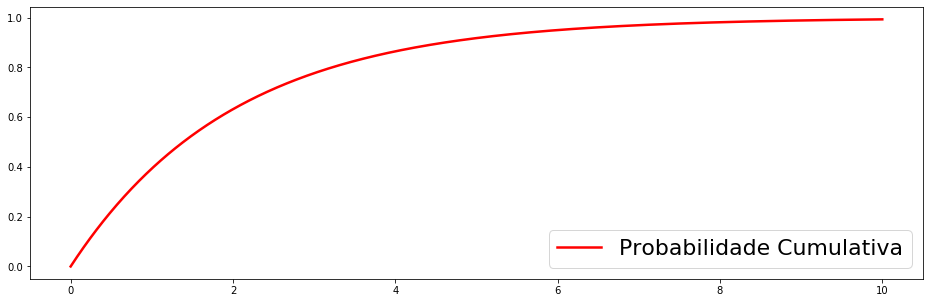

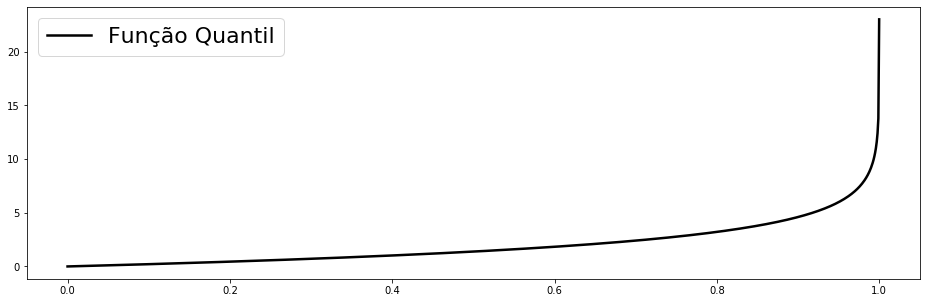

In [12]:
# Representação gráfica das funções F e Q:

def F(x,xi):
    return 1 - np.exp(-x/xi)

def Q(x,xi):
    return -xi*np.log(1-x)

xi = 2.0
x_in = 0
x_fin = 10.0
pts = 1000
xx_mesh = np.linspace(x_in,x_fin,pts)

plt.figure(figsize=(16,5))
plt.plot(xx_mesh,F(xx_mesh,xi),'r',linewidth=2.5,label="Probabilidade Cumulativa")
plt.legend(fontsize=22)
plt.show()

x_in = 0.0
x_fin = 0.99999
xx_mesh = np.linspace(x_in,x_fin,pts)

plt.figure(figsize=(16,5))
plt.plot(xx_mesh,Q(xx_mesh,xi),'k',linewidth=2.5,label="Função Quantil")
plt.legend(fontsize=22)
plt.show()
    

4. Calcule analiticamente a função característica, $\tilde{\rho}\left(q\right)$ da distribuição exponencial e deduza uma expressão geral para o cumulante de ordem $n$ - $\kappa_{n}$ - da distribuição.

Resposta:

Quanto a função característica, nós poderíamos calculá-la através da transformada de Fourier de $\rho\left(x;\xi\right)$, isto é

$$\tilde{\rho}\left(q\right)=\frac{1}{\xi}\int_{0}^{\infty}\!\!\!\!dxe^{iqx-\frac{x}{\xi}}.$$

No entanto, uma vez que $\tilde{\rho}\left(q\right)$ é também a função geradora dos momentos de $\rho$, e estes têm a forma simples determinada anteriormente, podemos simplesmente escrever
$$\tilde{\rho}\left(q\right)=\sum_{n=0}^{\infty}\frac{\left(iq\right)^{n}}{n!}\xi^{n}n!=\sum_{n=0}^{\infty}\left(\frac{iq}{\xi}\right)^{n}=\frac{1}{1-i\xi q}.$$

Note-se que, à semelhança do caso Gaussiano, também aqui a função geradora dos cumulantes de $\rho\left(x\right)$ é bastante simples,

$$\ln\left(\tilde{\rho}\left(q\right)\right)=\ln\left(1-i\xi q\right)=\sum_{n=1}^{\infty}\frac{\left(i\xi q\right)^{n}}{n},$$

de onde se conclui que a expressão geral dos cumulantes é 

$$k_{n}=\xi^{n}\left(n-1\right)!.$$

# Problema 2
Nesta questão, a distribuição exponencial da questão anterior será estudada numericamente.
1. Implemente uma rotina que permita gerar uma amostra (de comprimento $N$) de números aleatórios positivos distribuídos com uma densidade $\rho\left(x;\xi\right)$. Utilize o método mais eficiente que conheça.

Resposta:

Uma vez que temos acesso a uma expressão analítica para a função quantil de $\rho(x;\xi)$, podemos utilizar o método de inversão. 

In [14]:
def ExpRandom(Points,Xi):
    us = np.random.rand(Points)
    xs = -(Xi)*np.log(1-us)
    return xs

N = 4*10**6
Xi = 1.0
xs = ExpRandom(N,Xi)
print(xs)

[1.07850102 2.17141167 1.38183774 ... 0.9750196  0.92168462 0.59918765]


2. Escreva uma função que calcule o histograma desta distribuição, de forma eficiente. Represente os histogramas para $\xi=1,4,16,64$, no mesmo painel. Reflicta sobre qual é a representação mais apropriada.

Resposta:

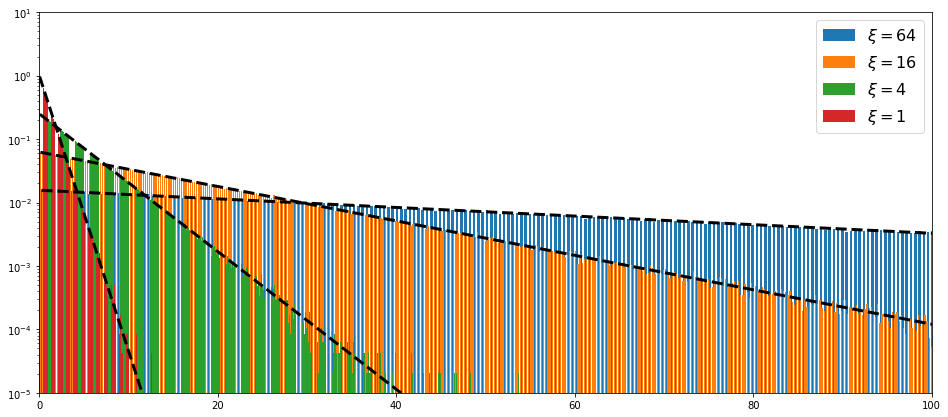

In [24]:
def Histogram(xs,Lim_Inf,Lim_Sup,bins):
    x_mesh = (np.linspace(Lim_Inf,Lim_Sup,bins+1)[1:] + np.linspace(Lim_Inf,Lim_Sup,bins+1)[:bins])/2.
    delta_x = x_mesh[1]-x_mesh[0]
    Histogram = np.zeros(len(x_mesh))
    y_values = xs[(xs<Lim_Sup) & (xs>Lim_Inf)]
    Norm = 0
    for y in y_values:
        index = int(bins*(y-Lim_Inf)/(Lim_Sup-Lim_Inf))
        Histogram[index] += 1
        Norm += 1
    binwidth = x_mesh[1] - x_mesh[0]
    return x_mesh, Histogram/Norm/delta_x, binwidth

N = 4*10**5
Xis = np.flip(np.array([1.,4.,16.,64.]))
bins = 4000

plt.figure(figsize=(16,7))
for Xi in Xis:
    xs = ExpRandom(N,Xi)
    xx, yy, wd = Histogram(xs,0,30*Xi,bins)
    plt.bar(xx,yy,width=0.6*wd,label=r"$\xi = %d$"%(Xi))
    plt.plot(xx,(1/Xi)*np.exp(-xx/Xi),'k--',linewidth=3.0)
    bins /= 2
    bins = int(bins)
plt.xlim(-0.05,100)
plt.ylim(1.e-5,10)
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

3. Utilize a rotinas da alínea 2.1 para gerar realizações aleatórias para o estimador do valor médio,

\begin{equation}
    \bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i}
\end{equation}

,com $N$ variáveis (onde $x_{i}$ são as variáveis independentes com distribuição exponencial). Utilizando $\xi=1$ e aumentando $N$ calcule o erro quadrático médio na determinação da média $\left\langle x \right\rangle_{\rho}$ e identifique qual o comportamento assimptótico desse erro com $N$.

Resposta:

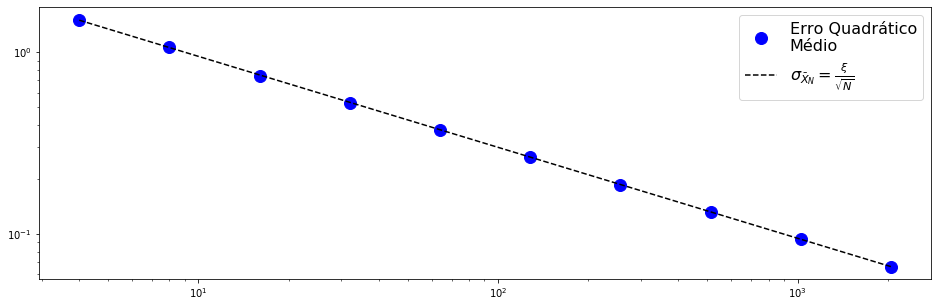

In [44]:
Samples = 10000 # Número de Estimativas da Média
xi = 3.0

def RandomAverage(Samples,N,xi):
    Sample = np.zeros(Samples)
    for i in range(Samples):
        Sample[i] = ExpRandom(N,xi).mean()
    return Sample

QuadErr = np.zeros((10,2))
QuadErr[:,0] = np.array([4,8,16,32,64,128,256,512,1024,2048],dtype=float)
i = 0
for N in QuadErr[:,0]:
    SS = RandomAverage(Samples,int(N),xi)
    QuadErr[i,1] = np.sqrt(SS.var())
    i += 1
    
plt.figure(figsize=(16,5))
plt.plot(QuadErr[:,0],QuadErr[:,1],'bo',markersize=12.0,label="Erro Quadrático\nMédio")
plt.plot(np.linspace(4,2048,1000),xi/np.sqrt(np.linspace(4,2048,1000)),'k--',label=r"$\sigma_{\bar{X}_{N}}=\frac{\xi}{\sqrt{N}}$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

4. Como sabe, o estimador $\bar{X}_{N}$ é uma variável aleatória com uma dada distribuição (dependente de $N$). Escreva uma rotina que gere amostras independentes de $\bar{X}_{N}$, com $N>1$ fixo.

Resposta:

In [42]:
Samples = 10000 # Número de Estimativas da Média
N = 100
xi = 1.0

def RandomAverage(Samples,N,xi):
    Sample = np.zeros(Samples)
    for i in range(Samples):
        Sample[i] = ExpRandom(N,xi).mean()
    return Sample

SS = RandomAverage(Samples,N,xi)
print(SS)

[0.97128029 1.19724054 1.17108489 ... 0.90788791 0.84630703 1.0917148 ]


5. Represente os histogramas de $\bar{X}_{N}$ e prove numericamente a emergência do Teorema de Limite Central quando $N$ é suficientemente grande. Utilize $\xi=1$ e $N=4,16,64,256,1024$. 

Resposta:

Aqui pretende-se que se observe a distribuição de probabilidade associada à variável $\bar{X}_{N}$, que deverá ser gaussiana (uma vez que todos os cumulantes da distribuíção exponencial são finitos) no limite $N\to\infty$

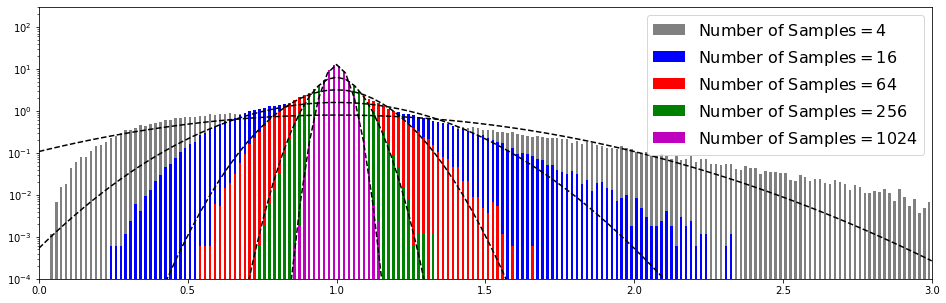

In [66]:
def RandomAverage(Samples,N,xi):
    Sample = np.zeros(Samples)
    for i in range(Samples):
        Sample[i] = ExpRandom(N,xi).mean()
    return Sample

def GaussianaAssimpt(xx,N,xi):
    return np.exp(-N*(xx - xi)**2/(2*xi*xi))/np.sqrt(2*np.pi*xi*xi/N)

def Histogram(xs,Lim_Inf,Lim_Sup,bins):
    x_mesh = (np.linspace(Lim_Inf,Lim_Sup,bins+1)[1:] + np.linspace(Lim_Inf,Lim_Sup,bins+1)[:bins])/2.
    delta_x = x_mesh[1]-x_mesh[0]
    Histogram = np.zeros(len(x_mesh))
    y_values = xs[(xs<Lim_Sup) & (xs>Lim_Inf)]
    Norm = 0
    for y in y_values:
        index = int(bins*(y-Lim_Inf)/(Lim_Sup-Lim_Inf))
        Histogram[index] += 1
        Norm += 1
    binwidth = x_mesh[1] - x_mesh[0]
    return x_mesh, Histogram/Norm/delta_x, binwidth

Samples = 100000 # Número de Estimativas da Média
xi = 1.0
Limite_Sup = 5*xi
bins = 300

colors = ['grey','b','r','g','m']
plt.figure(figsize=(16,5))
i=0
for N in np.array([4,16,64,256,1024]):
    SS = RandomAverage(Samples,N,xi)
    Hist_xx, Hist_yy, binsize = Histogram(SS,0.0,Limite_Sup,bins)
    plt.bar(Hist_xx,Hist_yy,width=0.5*binsize,color=colors[i],label=r"Number of Samples$=%d$"%(N))
    plt.plot(np.linspace(0,3.0*xi,100),GaussianaAssimpt(np.linspace(0,3.0*xi,100),N,xi),'k--')
    i += 1
plt.xlim(0,3*xi)
plt.ylim(1.e-4,300)
plt.legend(fontsize=16) 
plt.yscale("log")
plt.show()

6. Repita a análise para $\xi=10$ e analize, qualitativamente, se o $N$ a partir do qual $\bar{X}_{N}$ já tem uma distribuíção gaussiana aumentou ou diminuiu. Comente à luz do que sabe sobre o Teorema do Limite Central para uma soma de variáveis independentes.

Resposta:

A resposta a este exercício é análoga ao anterior - de facto, as curvas serão as mesmas após re-escalamento por $x\to\frac{x}{\xi}$ e $y\to y\times\xi$

# Problema 3
Considere uma variável aleatória com uma distribuição de Cauchy,

\begin{equation}
\rho_{\text{C}}\left(x;\mu,\gamma\right)=\frac{\gamma}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)},
\end{equation}

centrada em $x=\mu$ e com uma largura a meia-altura $\gamma$ em torno de $\mu$. 
1. Calcule a função característica de $\rho_{\text{C}}\left(x;\mu,\gamma\right)$ e a função geradora dos cumulantes. Com isso, prove que todos os momentos e cumulantes desta distribuição não estão bem definidos.

Resposta:

Por definição, a função característica associada escreve-se da seguinte forma:

$$\tilde{\rho}\left(k;\mu,\gamma\right)=\frac{1}{\pi}\int_{-\infty}^{\infty}\!\!\!\!\!dx\frac{\gamma e^{ikx}}{\gamma^{2}+\left(x-\mu\right)^{2}}.$$

O primeiro passo neste cálculo consiste na simplificação do integral através da mudança de variável $u=\left(x-\mu\right)/\gamma\to du=dx/\gamma$. Isto permite-nos re-escrever a equação anterior da seguinte forma

$$\tilde{\rho}\left(k;\mu,\!\gamma\right)\!=\!\frac{1}{\pi}e^{i\mu k}\!\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!du\frac{e^{ik\sigma u}}{1+u^{2}}\!=\!\frac{1}{\pi}e^{i\mu k}\!\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!du\frac{e^{ik\gamma u}}{\left(1\!+\!iu\right)\left(1\!-\!iu\right)}.$$

Uma decomposição em frações simples do integrando permite-nos dividir o integral anterior em dois,

$$\tilde{\rho}\left(k;\mu,\!\gamma\right)=\frac{e^{i\mu k}}{2\pi}\left[\int_{-\infty}^{\infty}\!\!\!\!\!du\frac{e^{ik\gamma u}}{1+iu}+\int_{-\infty}^{\infty}\!\!\!\!\!du\frac{e^{ik\gamma u}}{1-iu}\right],$$

onde agora podemos usar o facto de que 

$$\frac{1}{1\pm iu}=\int_{0}^{\infty}\!\!\!\!d\tau e^{-\left(1\pm iu\right)\tau}$$

e assim, reescrever ambos os termos do integral na seguinte forma: 

$$\tilde{\rho}\left(k;\mu,\!\gamma\right)\!	=\!\frac{e^{i\mu k}}{2\pi}\left[\int_{-\infty}^{\infty}\!\!\!\!\!\!\!du\int_{0}^{\infty}\!\!\!\!\!\!d\tau e^{-\tau-iu\tau+ik\gamma u}\right.\left.+\int_{-\infty}^{\infty}\!\!\!\!\!\!\!du\int_{0}^{\infty}\!\!\!\!\!\!d\tau e^{-\tau+iu\tau+ik\gamma u}\right].$$

Uma vez que os integrais em u e \tau têm domínios de integração independentes, é legitimo comutarmos a sua ordem. Isto implica que a  é equivalente a 

$$\tilde{\rho}\left(k;\mu,\gamma\right)	=\frac{e^{i\mu k}}{2\pi}\left[\int_{0}^{\infty}\!\!\!\!\!\!d\tau e^{-\tau}\!\!\int_{-\infty}^{\infty}\!\!\!\!\!\!due^{iu\left(k\gamma-\tau\right)}\right.
\left.+\int_{0}^{\infty}\!\!\!\!\!\!d\tau e^{-\tau}\!\!\int_{-\infty}^{\infty}\!\!\!\!\!\!\!due^{iu\left(k\gamma+\tau\right)}\right],$$

onde se pode utilizar a representação de Fourier do $\delta$-Dirac — $\int due^{iux}=2\pi\delta\left(x\right)$ — para transformar em 

$$\tilde{\rho}\left(k;\mu,\!\gamma\right)\!=\!e^{i\mu k}\left[\!\int_{0}^{\infty}\!\!\!\!\!\!d\tau e^{-\tau}\delta\left(k\gamma-\tau\right)+\!\int_{0}^{\infty}\!\!\!\!\!\!d\tau e^{-\tau}\delta\left(k\gamma+\tau\right)\right].$$

Agora, como o intervalo de integração de $\tau$ é $\left[0,\infty\right]$, temos duas situações:

1. k>0 — onde apenas o primeiro integral é não nulo

$$\tilde{\rho}\left(k;\mu,\gamma\right)=e^{i\mu k-\gamma k};$$

2. k<0 — onde apenas o segundo contribui, logo,

$$\tilde{\rho}\left(k;\mu,\gamma\right)=e^{i\mu k+\gamma k}.$$

Usando |k|, podemos juntar ambos os casos numa única expressão. Assim obtemos

$$\tilde{\rho}\left(k;\mu,\gamma\right)=e^{i\mu k- \gamma|k|}.$$

Note-se que a equação anterior nos permite calcular a função geradora dos cumulantes, de uma forma trivial, i.e.

$$\ln\left[\tilde{\rho}\left(k;\mu,\gamma\right)\right]= i\mu k- \gamma|k|,$$

que não é uma função derivável em $k=0$. Isto implica a não existência de uma expansão de Taylor em torno deste ponto e, em consequência, a inexistência de cumulantes.

2. Utilize a função característica calculada na alínea anterior para provar que dadas duas variáveis aleatórias, $X_{1,2}$, com distribuição de Cauchy $\rho_{\text{C}}\left(x;\mu,\gamma\right)$, uma combinação linear arbitrária delas — $Y=aX_{1}+bX_{2}$ — tem a distribuição

\begin{equation}
\rho\left(Y\right)=\frac{\left(\left|a\right|+\left|b\right|\right)\gamma}{\pi\left(\left(x-(a+b)\mu\right)^{2}+\left(\left|a\right|+\left|b\right|\right)^{2}\gamma^{2}\right)}.
\end{equation}

Resposta:

Dadas duas distribuíções de Cauchy idênticas para $X_{1}$ e $X_{2}$, a distribuição associada à combinação linear $Y=aX_{1}+bX_{2}$ pode ser obtida analiticamente da seguinte forma:
\begin{equation}
\rho_{Y}\left(y\right)=\iint_{-\infty}^{\infty}dx_{1}dx_{2}\rho_{X}\left(x_{1}\right)\rho_{X}\left(x_{2}\right)\delta\left(y-ax_{1}-bx_{2}\right)=\frac{1}{|b|}\int_{-\infty}^{\infty}dx_{1}\rho_{X}\left(x_{1}\right)\rho_{X}\left(\frac{y-ax_{1}}{b}\right)
\end{equation}

ou, usando a representação em termos de funções características,

\begin{equation}
\rho_{X}\left(x\right)=\frac{1}{2\pi}\int_{-\infty}^{\infty}dke^{-ikx}\tilde{\rho}_{X}\left(k\right),
\end{equation}

ficamos com

\begin{equation}
\rho_{Y}\left(y\right)=\frac{1}{4\pi^{2}|b|}\iint_{-\infty}^{\infty}dkdq\tilde{\rho}_{X}\left(k\right)\tilde{\rho}_{X}\left(q\right)e^{-iqy/b}\int_{-\infty}^{\infty}dx_{1}e^{-i\left(k-\frac{a}{b}q\right)x_{1}}. 
\end{equation}

Como $\int_{-\infty}^{\infty}dx_{1}e^{-i\left(k-\frac{a}{b}q\right)x_{1}}=2\pi\delta\left(k-aq/b\right)$, obtemos com

\begin{equation}
\rho_{Y}\left(y\right)=\frac{1}{2\pi|b|}\int_{-\infty}^{\infty}dq\tilde{\rho}_{X}\left(\frac{aq}{b}\right)\tilde{\rho}_{X}\left(q\right)e^{-iqy/b},
\end{equation}

e, por fim, podemos fazer uma mudança de variável $p=q/b$, obtendo

\begin{equation}
\rho_{Y}\left(y\right)=\frac{1}{2\pi}\int_{-\infty}^{\infty}dq\tilde{\rho}_{X}\left(aq\right)\tilde{\rho}_{X}\left(bq\right)e^{-iqy}.
\end{equation}

Agora, como sabemos que a função caracteristica de uma distribuição de Cauchy é $\tilde{\rho}_{X}\left(k\right)=e^{i\mu k-\gamma|k|}$,temos

\begin{equation}
\rho_{Y}\left(y\right)	=\frac{1}{2\pi}\int_{-\infty}^{\infty}dpe^{i\left[\mu(a+b)-y\right]p-\gamma(|a|+|b|)|p|}=
	\frac{1}{2\pi}\int_{0}^{\infty}dpe^{i\left[\mu(a+b)-y\right]p-\gamma(|a|+|b|)|p}+
	\qquad+\frac{1}{2\pi}\int_{0}^{\infty}dpe^{-i\left[\mu(a+b)-y\right]p-\gamma(|a|+|b|)|p}.
\end{equation}

Ou seja,
    
\begin{equation}    
\rho_{Y}\left(y\right)	=\frac{1}{2\pi}\left[\frac{1}{\gamma(|a|+|b|)-i\left[\mu(a+b)-y\right]}+\frac{1}{\gamma(|a|+|b|)+i\left[\mu(a+b)-y\right]}\right]
	=\frac{1}{\pi}\left(\frac{\gamma(|a|+|b|)}{\gamma^{2}(|a|+|b|)^{2}+\left[y-\mu(a+b)\right]^{2}}\right),
\end{equation}


que é a resposta à questão.

3. Generalize o resultado para a distribuição do estimador da média de $x$, com $N$ amostras, isto é $\bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i}$.

Resposta:

O resultado anterior pode ser iterado para aplicação a a combinação linear de um número arbitrário de variáveis independentes. No caso do estimador da média, $\bar{X}_{N}$, temos que a distribuíção para qualquer valor de $N$ (e não apenas no limite assimptótico) é uma distribuíção de Cauchy identica à original -

\begin{equation}
\rho\left(\bar{X}_{N}\right)=\frac{\gamma}{\pi\left(\left(\bar{X}_{N}-\mu\right)^{2}+\gamma^{2}\right)}.
\end{equation}

4. Calcule a função cumulativa e a função quantil de $\rho_{\text{C}}\left(x\right)$. Represente estas funções num gráfico.

Resposta:

A função cumulativa da Lorentziana

\begin{equation}
\rho_{\text{C}}\left(x;\mu,\gamma\right)=\frac{\gamma}{\pi\left(\gamma^{2}+\left(x-\mu\right)^{2}\right)}
\end{equation}
é dada por

\begin{equation}
F_{\text{C}}\left(x\right)=\frac{1}{\pi\gamma}\int_{-\infty}^{x}\frac{d\tau}{1+\left(\frac{\tau-\mu}{\gamma}\right)^{2}}=\frac{1}{\pi}\int_{-\infty}^{\left(x-\mu\right)/\gamma}\frac{du}{1+u^{2}}=\frac{1}{\pi}\left(\arctan\left(\frac{x-\mu}{\gamma}\right)+\frac{\pi}{2}\right).
\end{equation}

Isto dá origem à seguinte função quantil, 

\begin{equation}
Q_{\text{C}}\left(y\right)=F^{-1}\left(y\right):y=\frac{1}{\pi}\arctan\left(\frac{Q_{\text{C}}\left(y\right)-\mu}{\gamma}\right)+\frac{1}{2}\Rightarrow Q_{\text{C}}\left(y\right)=\mu+\gamma\tan\left(\pi y-\frac{\pi}{2}\right)
\end{equation}

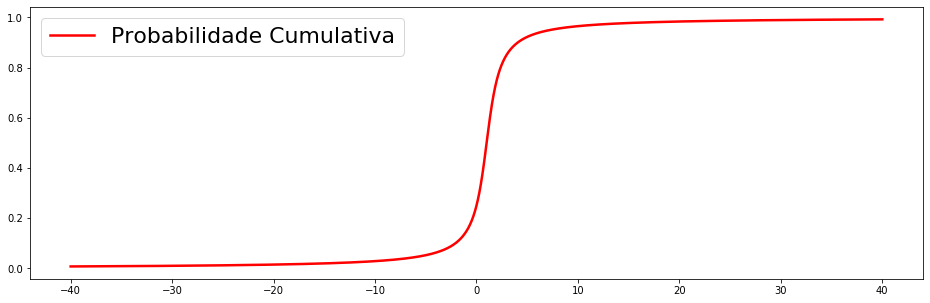

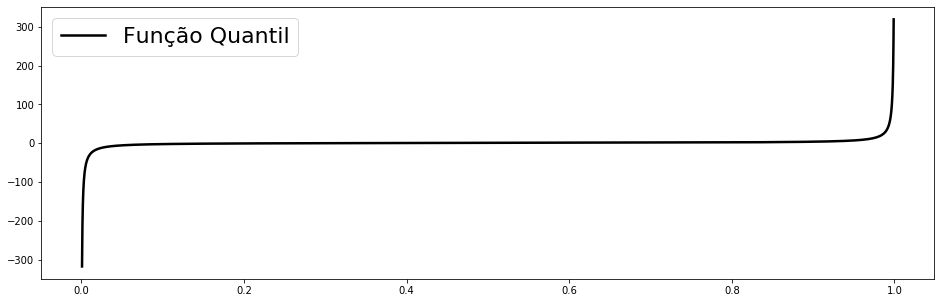

In [77]:
# Representação Gráfica das funções Q e F:

def F(x,gamma,mu):
    return (np.arctan((x-mu)/gamma)+0.5*np.pi)/np.pi

def Q(x,gamma,mu):
    return mu + gamma*np.tan(np.pi*(x - 0.5))

gamma = 1.0
mu = 1.0
x_in = -40.0
x_fin = 40.0
pts = 10000
xx_mesh = np.linspace(x_in,x_fin,pts)

plt.figure(figsize=(16,5))
plt.plot(xx_mesh,F(xx_mesh,gamma,mu),'r',linewidth=2.5,label="Probabilidade Cumulativa")
plt.legend(fontsize=22)
plt.show()

x_in = 0.001
x_fin = 0.999
xx_mesh = np.linspace(x_in,x_fin,pts)

plt.figure(figsize=(16,5))
plt.plot(xx_mesh,Q(xx_mesh,gamma,mu),'k',linewidth=2.5,label="Função Quantil")
plt.legend(fontsize=22)
plt.show()


5. Implemente um método de inversão para gerar números aleatórios com a distribuição $\rho_{\text{C}}\left(x;\mu,\gamma\right)$. Represente um histograma para uma amostragem, que mostre claramente que a amostragem está distribuída de acordo com $\rho_{\text{C}}$. Use $\mu=0.5$ e $\gamma=1$ e utilize uma representação apropriada.

Resposta:

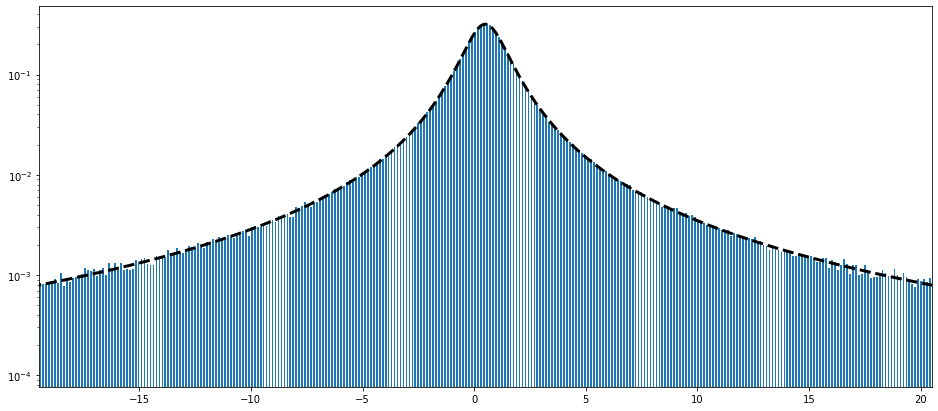

In [4]:
def CauchyRandom(Points,Mu,Gamma):
    us = np.random.rand(Points)
    xs = Mu + Gamma*np.tan(np.pi*(us - 0.5))
    return xs

def Histogram(xs,Lim_Inf,Lim_Sup,bins):
    x_mesh = (np.linspace(Lim_Inf,Lim_Sup,bins+1)[1:] + np.linspace(Lim_Inf,Lim_Sup,bins+1)[:bins])/2.
    delta_x = x_mesh[1]-x_mesh[0]
    Histogram = np.zeros(len(x_mesh))
    y_values = xs[(xs<Lim_Sup) & (xs>Lim_Inf)]
    Norm = 0
    for y in y_values:
        index = int(bins*(y-Lim_Inf)/(Lim_Sup-Lim_Inf))
        Histogram[index] += 1
        Norm += 1
    binwidth = x_mesh[1] - x_mesh[0]
    return x_mesh, Histogram/Norm/delta_x, binwidth

Points = 10**6
mu = 0.5
gamma = 1.0
xs = CauchyRandom(Points,mu,gamma)

xx, yy, wd = Histogram(xs,-gamma*40 + mu,gamma*40 + mu,600)
plt.figure(figsize=(16,7))
plt.bar(xx,yy,width=0.6*wd)
plt.plot(xx,(gamma/np.pi)*(1/(gamma**2 + (xx - mu)**2)),'k--',linewidth=3.0)
plt.xlim(-gamma*20+mu,gamma*20+mu)
plt.yscale("log")
plt.show()

6. Utilize as rotinas anteriores para gerar realizações aleatórias para o estimador do valor médio,
\begin{equation}
\bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i},
\end{equation}
com $N$ variáveis, onde $x_{i}$ são as variáveis aleatórias de Cauchy. 

Resposta:

In [5]:
Samples = 500 # Número de Estimativas da Média
N = 10
Mu = 0.1
Gamma = 1.0

def RandomAverageCauchy(Samples,N,Mu,Gamma):
    Sample = np.zeros(Samples)
    for i in range(Samples):
        Sample[i] = CauchyRandom(N,Mu,Gamma).mean()
    return Sample

SS = RandomAverageCauchy(Samples,N,Mu,Gamma)
print(SS)

[-1.08183018e+00 -6.04808118e-01 -2.07003151e+00  6.71233168e-02
 -3.71624604e-01  2.19329042e+00 -2.46940178e+00 -2.22986070e-01
  1.42311420e+00 -2.31234143e+00 -2.63076370e+00 -2.70353392e+00
  4.23999686e-01  2.79594072e-01 -7.47548160e-01 -1.07234060e+01
  1.43100971e-01  1.85797333e+01  4.36624954e+00 -9.63992373e-01
 -4.04279030e-01 -7.95944152e-01 -3.43575182e-01 -9.85568017e-01
 -3.59369831e+00 -1.28958279e-01  1.51818629e-01  1.22813469e+00
 -2.73476896e+00 -2.73508002e+00 -1.78365344e+00 -2.41751983e-01
 -1.34990173e-01  4.39091021e-01  1.69059695e+00  1.04115418e+00
 -2.08890551e-01 -5.55301895e-01  7.41811108e+00  5.60311551e+00
  6.88504563e-01  8.33982659e-01  6.96095979e-01  7.06286516e-02
 -1.33920824e+00 -8.25568897e-01 -2.09961014e+00 -4.22244939e+00
  5.99076960e+00  2.95939856e-01  1.05810937e+00  9.54295482e-01
  2.48090229e-01 -6.87591633e+00 -7.21993817e-01 -1.35231223e+00
 -9.29602169e-01  3.60546755e-01 -1.69089420e+00 -1.11010983e+00
  2.17624386e+00  2.44541

7. Utilizando $\mu=0$ e $\gamma=1$, calcule o erro quadrático médio na determinação de $\left\langle x \right\rangle_{\rho_{\text{C}}}$ e identifique qual o comportamento assimptótico desse erro com $N$.

Resposta: 

Como foi previsto anteriormente, a distribuíção do estimador da média é independente do número de amostras, se estas tiverem uma distribuíção de Cauchy. Assim sendo, não se espera que o erro quadrático médio diminua com $N$ (isto é, a estatistica não melhora).

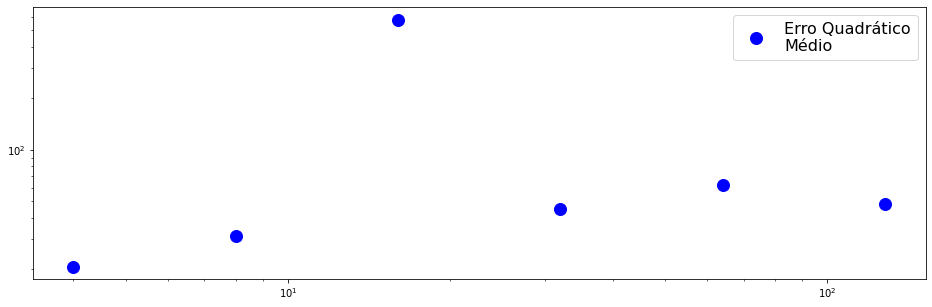

In [6]:
Samples = 1000 # Número de Estimativas da Média
Mu = 0.0
Gamma = 1.0

QuadErr = np.zeros((6,2))
QuadErr[:,0] = np.array([4,8,16,32,64,128],dtype=float)
i = 0
for N in QuadErr[:,0]:
    SS = RandomAverageCauchy(Samples,int(N),Mu,Gamma)
    QuadErr[i,1] = np.sqrt(SS.var())
    i += 1
    
plt.figure(figsize=(16,5))
plt.plot(QuadErr[:,0],QuadErr[:,1],'bo',markersize=12.0,label="Erro Quadrático\nMédio")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

8. Utilizando $\mu=0$, $\gamma=1.0$ e $N=4,16,64,256$. Faça os histogramas de $\bar{X}_{N}$ e prove que a distribuição assimptótica em N, não é uma Gaussiana (isto é, o Teorema de Limite Central não se aplica a $\rho_{\text{C}}$). Qual é a distribuição de $\bar{X}_{N\to\infty}$, neste caso?

Para todos os N, a distribuição é de Cauchy.

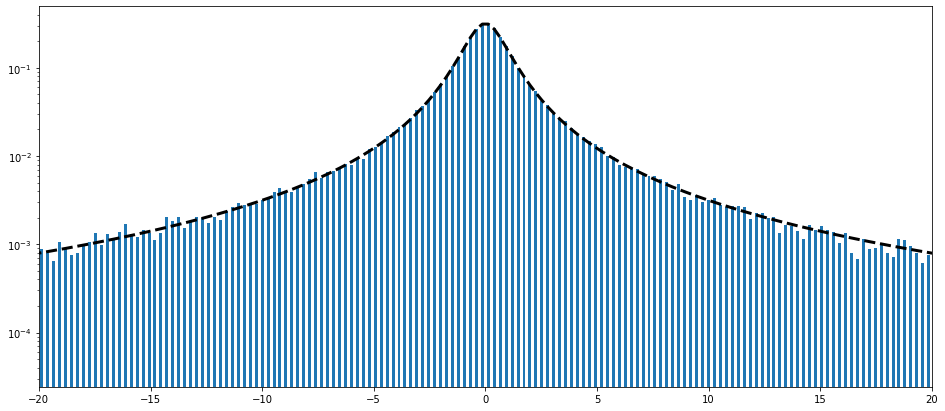

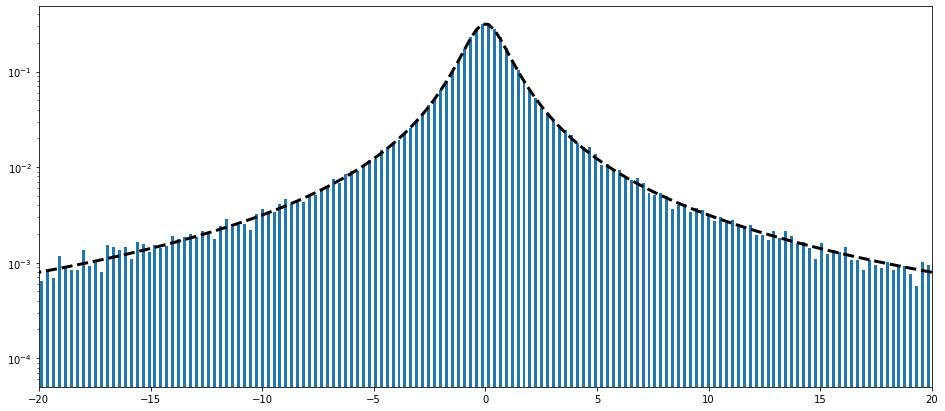

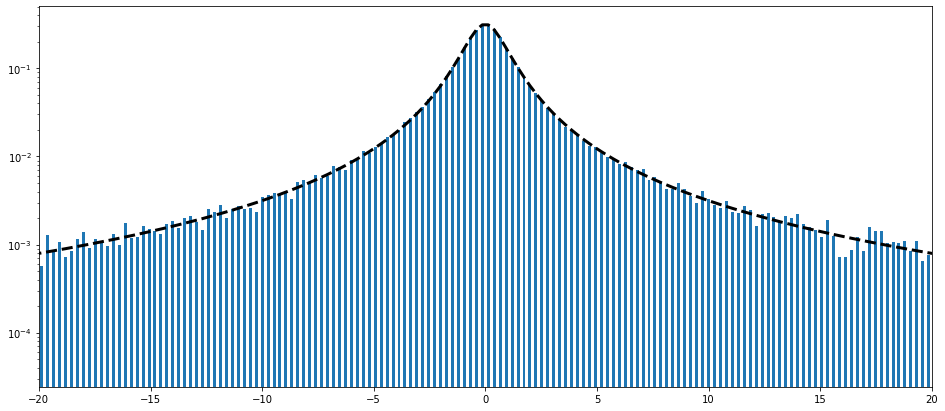

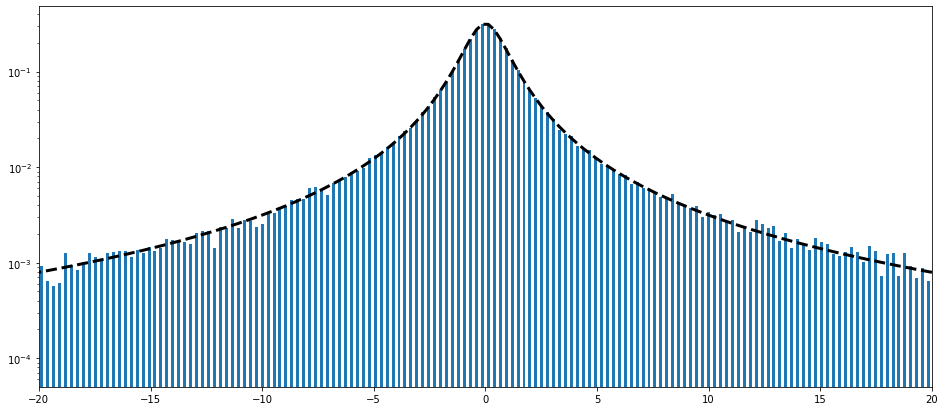

In [12]:
Points = 10**5
N = [4,16,64,256]

Mu = 0.0
Gamma = 1.0


for i in range(len(N)):
    n = N[i]
    xs = RandomAverageCauchy(Points,n,Mu,Gamma)
    xx, yy, wd = Histogram(xs,-Gamma*40 + Mu,Gamma*40 + Mu,300)
    
    plt.figure(figsize=(16,7))
    plt.bar(xx, yy,width=0.5*wd)
    plt.plot(xx,(Gamma/np.pi)*(1/(Gamma**2 + (xx - Mu)**2)),'k--',linewidth=3.0)
    plt.xlim(-Gamma*20+Mu,Gamma*20+Mu)

    plt.yscale("log")
    plt.show()

# Problema 4

Uma primeira generalização para a distribuição de Cauchy é dada por

\begin{equation}
\rho_{\text{C,4}}\left(x;\mu,\gamma\right)=\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}},
\end{equation}
que agora tem caudas que se comportam como $x^{-4}$ assimptoticamente. 
1. Mostre que o primeiro e segundo cumulantes são finitos (calcule-os analiticamente) e que todos os outros são infinitos; 

O primeiro cumulante é a média $\left<x\right> $

\begin{equation}
\left<x\right> = \int_{-\infty}^{\infty}x\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}}dx
\end{equation}

Usando uma mudança de variável, $x\rightarrow x+\mu$ 
\begin{equation}
\left<x\right> = \int_{-\infty}^{\infty}\left(x+\mu\right)\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx
	=	\int_{-\infty}^{\infty}x\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx+\mu\int_{-\infty}^{\infty}\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx
	=	0+\mu
\end{equation}

onde se usou 
1. o facto do integrando ser impar e estar a ser integrado numa região simétrica e
2. o segundo integral ser a definição da norma 

Para o cálculo do segundo cumulante, usa-se uma técnica semelhante
\begin{equation}
\left<x^2\right> = \int_{-\infty}^{\infty}x^{2}\frac{2\gamma^{3}}{\pi\left(\left(x-\mu\right)^{2}+\gamma^{2}\right)^{2}}dx = \int_{-\infty}^{\infty}\left(x+\mu\right)^{2}\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx
\end{equation}
expandindo o quadrado e usando os mesmos factos do integral anterior
\begin{equation}
\left<x^2\right> = \int_{-\infty}^{\infty}x^{2}\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx+\int_{-\infty}^{\infty}2x\mu\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx+\int_{-\infty}^{\infty}\mu^{2}\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx = \int_{-\infty}^{\infty}x^{2}\frac{2\gamma^{3}}{\pi\left(x^{2}+\gamma^{2}\right)^{2}}dx+\mu^{2}
\end{equation}

Fazendo uma mudança de variável $ x \rightarrow x \gamma $, este integral é
\begin{equation}
\left<x^2\right> = \frac{2\gamma^{2}}{\pi}\int_{-\infty}^{\infty}\frac{x^{2}}{\left(x^{2}+1\right)^{2}}dx+\mu^{2}
\end{equation}

e pode ser resolvido com recurso à mudança de variável $ x=\tan\left(\theta\right) $
\begin{equation}
\left<x^2\right> = \gamma^{2}+\mu^{2}
\end{equation}

logo, o segundo cumulante é $ \kappa_2 = \gamma^2 $


2. Implemente um método de aceitação/recusa para gerar amostras com esta distribuição, propondo com distribuíção de Cauchy, geradas pelo método implementado na alínea 3.5. 

Resposta:

Função Probabilidade de Proposta

\begin{equation}
f\left(x\right)=\frac{2\gamma^{3}}{\pi\left(\gamma^{2}+\left(x-\mu\right)^{2}\right)^{2}}=2\pi\gamma\left[g\left(x\right)\right]^{2}
\end{equation}

Logo, o critério de aceitação pode ser tomado como:

\begin{equation}
\frac{f\left(x\right)}{Mg\left(x\right)}=\frac{2\pi\gamma}{M}g\left(x\right)=\frac{2}{M\left(1+\frac{\left(x-\mu\right)^{2}}{\gamma^{2}}\right)}
\end{equation}

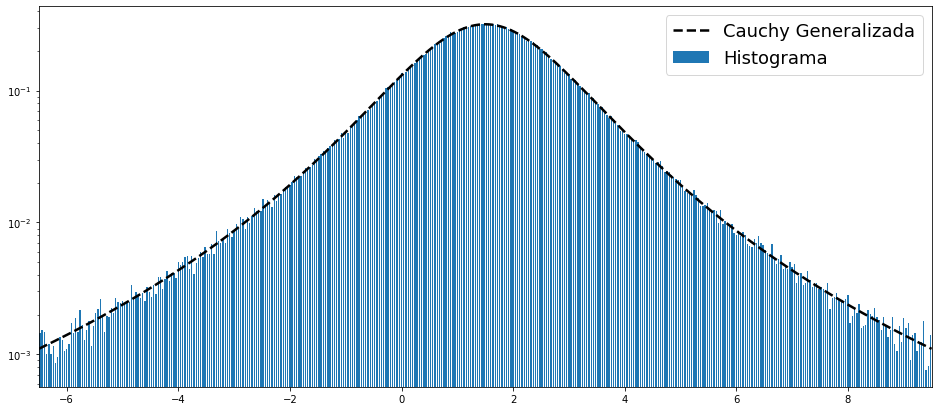

In [15]:
# Acceptance_Rejection for Generalized Cauchy Distribution

def Generate_Cauchy(Sam_Number,Mu,Gamma):
    samples_Unif = np.random.rand(Sam_Number)
    return (Gamma)*np.tan(samples_Unif*np.pi - np.pi/2.0) + Mu

def PropFunction(x,M,Gamma,Mu):
    return 2.0/M/(1+((x - Mu)/Gamma)**2)

def RandomCauchy_generalized(Sam_Number,Mu,Gamma):
    M = 2.5
    
    samples_Generalized = np.zeros(Sam_Number)
    for i in range(Sam_Number):
        
        accepted = False
        while not accepted:
            sample = Generate_Cauchy(1,Mu,Gamma)
            x = np.random.rand()
            proposal_prob = PropFunction(sample,M,Gamma,Mu)
            if x<=proposal_prob:
                samples_Generalized[i] = sample
                accepted = True
           
    return samples_Generalized

def Histogram(xs,Lim_Inf,Lim_Sup,bins):
    x_mesh = (np.linspace(Lim_Inf,Lim_Sup,bins+1)[1:] + np.linspace(Lim_Inf,Lim_Sup,bins+1)[:bins])/2.
    delta_x = x_mesh[1]-x_mesh[0]
    Histogram = np.zeros(len(x_mesh))
    y_values = xs[(xs<Lim_Sup) & (xs>Lim_Inf)]
    Norm = 0
    for y in y_values:
        index = int(bins*(y-Lim_Inf)/(Lim_Sup-Lim_Inf))
        Histogram[index] += 1
        Norm += 1
    binwidth = x_mesh[1] - x_mesh[0]
    return x_mesh, Histogram/Norm/delta_x, binwidth

Samples = 2**19
Gamma = 2.0
Mu = 1.5

SS = RandomCauchy_generalized(Samples,Mu,Gamma)
        
Lim_Inf = -Gamma*4. + Mu
Lim_Sup = Gamma*4. + Mu
bins = 400

xx, yy, wd = Histogram(SS,Lim_Inf,Lim_Sup,bins)
plt.figure(figsize=(16,7))
plt.bar(xx,yy,width=0.6*wd,label="Histograma")
plt.plot(np.linspace(Lim_Inf,Lim_Sup,1000),2.0*Gamma**3/np.pi/((Gamma**2 + (np.linspace(Lim_Inf,Lim_Sup,1000) - Mu)**2))**2,'k--',linewidth=2.5,label="Cauchy Generalizada")
plt.xlim(-gamma*20+mu,gamma*20+mu)
plt.yscale("log")
plt.xlim(Lim_Inf,Lim_Sup)
plt.legend(fontsize=18)
plt.show()

3. Utilize a rotina da alínea 4.2 para gerar realizações aleatórias para o estimador do valor médio,

\begin{equation}
\bar{X}_{N}=\frac{1}{N}\sum_{n=1}^{N}x_{i},
\end{equation}

com $N$ variáveis. Utilizando $\mu=0$ e $\gamma=1$, calcule o erro quadrático médio na determinação de $\left\langle x\right\rangle_{\rho_{\text{C}}}$ e identifique qual o comportamento assimptótico desse erro com $N$.

Uma regressão linear mostra que o declive da recta em escala log-log é -0.5, o que indica decaimento da forma $ 1/\sqrt(N) $, tal como previsto pelo Teorema do Limite Central

declive: -0.5062052107871681 
ordenada na origem: 0.023120235476236317


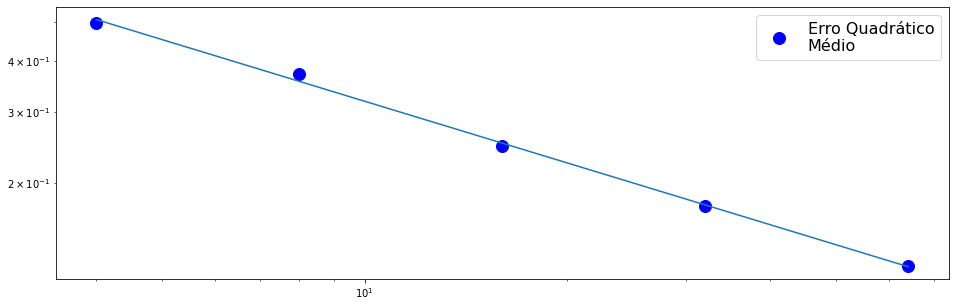

In [29]:
def RandomAverageCauchy_generalized(Samples,N,Mu,Gamma):
    Sample = np.zeros(Samples)
    for i in range(Samples):
        Sample[i] = RandomCauchy_generalized(N,Mu,Gamma).mean()
    return Sample



def Histogram(xs,Lim_Inf,Lim_Sup,bins):
    x_mesh = (np.linspace(Lim_Inf,Lim_Sup,bins+1)[1:] + np.linspace(Lim_Inf,Lim_Sup,bins+1)[:bins])/2.
    delta_x = x_mesh[1]-x_mesh[0]
    Histogram = np.zeros(len(x_mesh))
    y_values = xs[(xs<Lim_Sup) & (xs>Lim_Inf)]
    Norm = 0
    for y in y_values:
        index = int(bins*(y-Lim_Inf)/(Lim_Sup-Lim_Inf))
        Histogram[index] += 1
        Norm += 1
    binwidth = x_mesh[1] - x_mesh[0]
    return x_mesh, Histogram/Norm/delta_x, binwidth




Samples = 10000 # Número de Estimativas da Média
Mu = 0.0
Gamma = 1.0


QuadErr = np.zeros((5,2))
QuadErr[:,0] = np.array([4,8,16,32,64],dtype=float)
Ndata = len(QuadErr[:,0])
i = 0
for N in QuadErr[:,0]:
    SS = RandomAverageCauchy_generalized(Samples,int(N),Mu,Gamma)
    QuadErr[i,1] = np.sqrt(SS.var())
    i += 1
    
    
# Regressão linear do logaritmo dos dados
x = np.log(QuadErr[:,0])
y = np.log(QuadErr[:,1])
av_x  =  x.sum()/Ndata
av_x2 = (x**2).sum()/Ndata
av_y  =  y.sum()/Ndata
av_y2 = (y**2).sum()/Ndata
av_xy = (x*y).sum()/Ndata
m = (av_xy - av_x*av_y)/(av_x2 - av_x**2)
b = av_y - m*av_x
xlist = np.linspace(x[0], x[-1],100)
print("declive:",m,"\nordenada na origem:",b)

plt.figure(figsize=(16,5))
plt.plot(QuadErr[:,0],QuadErr[:,1],'bo',markersize=12.0,label="Erro Quadrático\nMédio")
plt.plot(np.exp(xlist), np.exp(xlist*m + b))
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()

4. Prove numericamente que a distribuição de $\bar{X}_{N\to\infty}$ é gaussiana e comente o resultado à luz da prova genérica do Teorema do Limite Central abordada nas aulas.

Nas aulas demonstrámos o teorema do limite central quando todos os cumulantes da distribuição existem. Neste caso, apenas existem o 1º e o 2º cumulante, portanto a prova do Teorema do Limite Central não é válida. Contudo, ainda assim é possível verificar que a distribuição tende para uma distribuição gaussiana quando $ N\rightarrow\infty$, embora mais lentamente

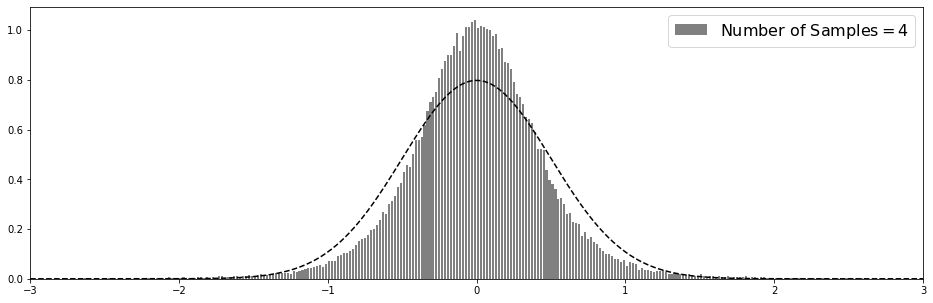

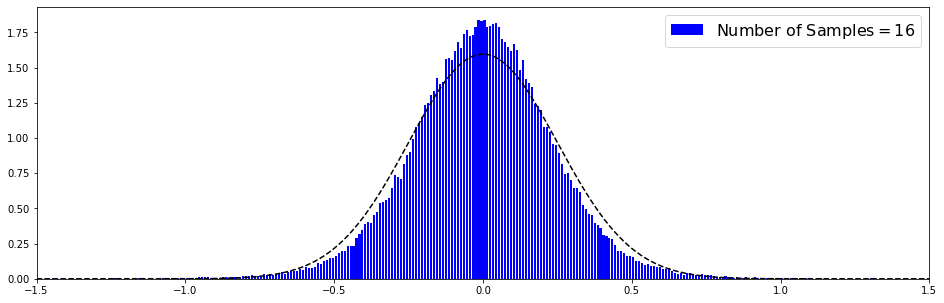

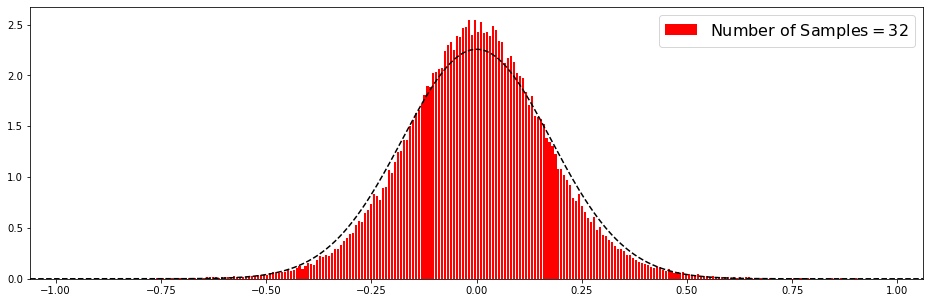

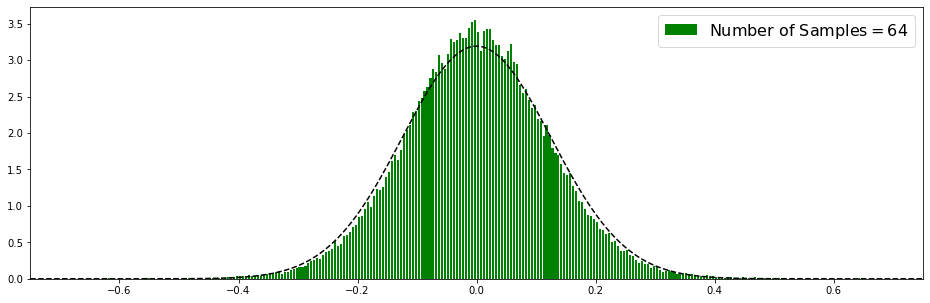

KeyboardInterrupt: 

In [38]:
def GaussianaAssimpt(xx,N,mu,sigma):
    return np.exp(-N*(xx - mu)**2/(2*sigma*sigma))/np.sqrt(2*np.pi*sigma*sigma/N)




Samples = 100000 # Número de Estimativas da Média
Mu = 0.0
Gamma = 1.0

bins = 300

colors = ['grey','b','r','g','m']

Ns = [4, 16, 32, 64, 128]
for i in range(len(Ns)):
    N = Ns[i]
    
    Limite_Sup = 6*Gamma/np.sqrt(N)
    SS = RandomAverageCauchy_generalized(Samples,N,Mu,Gamma)
    Hist_xx, Hist_yy, binsize = Histogram(SS,-Limite_Sup,Limite_Sup,bins)
    
    plt.figure(figsize=(16,5))
    plt.bar(Hist_xx,Hist_yy,width=0.7*binsize,color=colors[i],label=r"Number of Samples$=%d$"%(N))
    
    # Plot da gaussiana que teríamos pelo Teorema do Limite Central
    xs = np.linspace(-Limite_Sup, Limite_Sup,1000)
    plt.plot(xs,GaussianaAssimpt(xs, N, Mu, Gamma),'k--')    
    
    plt.xlim(-Limite_Sup, Limite_Sup)
    #plt.ylim(1.e-4,300)
    plt.legend(fontsize=16) 
    plt.show()